## Setup the Env


In [69]:
import os
import sys

import sagemaker
from sagemaker import get_execution_role

# Add the parent directory to the sys.path
sys.path.insert(0, os.path.abspath(".."))

# Define IAM role
role = get_execution_role()
role

# Establish S3 bucket connection
import boto3

s3 = boto3.client("s3")
bucket = "capstone-bucket-4-friends"

# Take a look at current dir
print(os.getcwd())

from file_utilities import s3_download

/home/sagemaker-user/capstone-2024-summer/src/shuo


## Import Package

In [70]:
!pip install seaborn
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import time
import logging
import torch.distributions as dist
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

In [71]:
# pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


In [72]:
torch.cuda.is_available()


True

In [73]:
import torch
import torch.nn as nn

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

# Example model
model = nn.Linear(10, 2)

# Move model to the device (GPU if available)
model.to(device)

# Example data
x = torch.randn(1, 10).to(device)
output = model(x)
print(output)


CUDA is available. Using GPU.
tensor([[-0.6965, -0.0782]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [74]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Load Data

In [75]:
# reload_path = s3_download("CRSP/crsp_2018-2023_clean_3.parquet")
# reload_path

In [76]:
os.getcwd()

'/home/sagemaker-user/capstone-2024-summer/src/shuo'

In [77]:
!pwd

/home/sagemaker-user/capstone-2024-summer/src/shuo


In [78]:
df = pd.read_parquet("../../data/crsp_2018-2023_clean_3.parquet")

In [79]:
df

date permno_id ncusip_id  cusip_id ticker share_code  \
9263    2018-01-02     10104  68389X10  68389X10   ORCL       11.0   
9264    2018-01-03     10104  68389X10  68389X10   ORCL       11.0   
9265    2018-01-04     10104  68389X10  68389X10   ORCL       11.0   
9266    2018-01-05     10104  68389X10  68389X10   ORCL       11.0   
9267    2018-01-08     10104  68389X10  68389X10   ORCL       11.0   
...            ...       ...       ...       ...    ...        ...   
7656951 2023-12-22     93436  88160R10  88160R10   TSLA       11.0   
7656952 2023-12-26     93436  88160R10  88160R10   TSLA       11.0   
7656953 2023-12-27     93436  88160R10  88160R10   TSLA       11.0   
7656954 2023-12-28     93436  88160R10  88160R10   TSLA       11.0   
7656955 2023-12-29     93436  88160R10  88160R10   TSLA       11.0   

        share_code_type share_code_detail exchange_code company_name  \
9263                  1                 1             1  ORACLE CORP   
9264                  1                 1             1  ORACLE CORP   
9265                  1                 1             1  ORACLE CORP   
9266                  1                 1             1  ORACLE CORP   
9267                  1                 1             1  ORACLE CORP   
...                 ...               ...           ...          ...   
7656951               1                 1             3    TESLA INC   
7656952               1                 1             3    TESLA INC   
7656953               1                 1             3    TESLA INC   
7656954               1                 1             3    TESLA INC   
7656955               1                 1             3    TESLA INC   

        primary_exchange trading_status security_status     naics  \
9263                   N              A               R  511210.0   
9264                   N              A               R  511210.0   
9265                   N              A               R  511210.0   
9266                   N              A               R  511210.0   
9267                   N              A               R  511210.0   
...                  ...            ...             ...       ...   
7656951                Q              A               R  336110.0   
7656952                Q              A               R  336110.0   
7656953                Q              A               R  336110.0   
7656954                Q              A               R  336110.0   
7656955                Q              A               R  336110.0   

        naics_sector naics_sector_name naics_secondary  ask_or_high_price  \
9263              51       Information          1210.0            47.8011   
9264              51       Information          1210.0            48.0700   
9265              51       Information          1210.0            48.1900   
9266              51       Information          1210.0            48.6300   
9267              51       Information          1210.0            49.0700   
...              ...               ...             ...                ...   
7656951           33     Manufacturing          6110.0           258.2200   
7656952           33     Manufacturing          6110.0           257.9700   
7656953           33     Manufacturing          6110.0           263.3400   
7656954           33     Manufacturing          6110.0           265.1300   
7656955           33     Manufacturing          6110.0           255.1900   

         ask_price  bid_or_low_price  bid_price  open_price  close_price  \
9263      46.63000          46.17000   46.62000    47.57000     46.63000   
9264      47.71000          47.44000   47.70000    47.53000     47.71000   
9265      48.18000          47.71500   48.17000    47.99000     48.18000   
9266      48.45000          48.28000   48.44000    48.42000     48.47000   
9267      48.99000          47.94000   48.98000    48.30000     48.98000   
...            ...               ...        ...         ...          ...   
7656951  252.53999    

In [80]:
df.dtypes

date                              datetime64[ns]
permno_id                                 object
ncusip_id                                 object
cusip_id                                  object
ticker                                    object
share_code                                object
share_code_type                           object
share_code_detail                         object
exchange_code                             object
company_name                              object
primary_exchange                          object
trading_status                            object
security_status                           object
naics                                     object
naics_sector                              object
naics_sector_name                         object
naics_secondary                           object
ask_or_high_price                        float64
ask_price                                float64
bid_or_low_price                         float64
bid_price           

## Feature Engineering

### Feature Selection

In [81]:
data = df[
    [
        "date",
        "permno_id",
        # "naics",
        "log_return",
        "abs_log_return",
        "sector_weighted_avg_log_return",
        "sector_simple_avg_log_return",
        "weighted_avg_log_return",
        "simple_avg_log_return",
        "log_return_7",
        "abs_log_return_7",
        "log_return_14",
        "abs_log_return_14",
        "log_return_28",
        "abs_log_return_28",
        "volatility_7",
        "volatility_14",
        "volatility_28",
    ]
].copy()
data

date permno_id  log_return  abs_log_return  \
9263    2018-01-02     10104   -0.013843        0.013843   
9264    2018-01-03     10104    0.022897        0.022897   
9265    2018-01-04     10104    0.009803        0.009803   
9266    2018-01-05     10104    0.006001        0.006001   
9267    2018-01-08     10104    0.010467        0.010467   
...            ...       ...         ...             ...   
7656951 2023-12-22     93436   -0.007731        0.007731   
7656952 2023-12-26     93436    0.015988        0.015988   
7656953 2023-12-27     93436    0.018647        0.018647   
7656954 2023-12-28     93436   -0.032104        0.032104   
7656955 2023-12-29     93436   -0.018738        0.018738   

         sector_weighted_avg_log_return  sector_simple_avg_log_return  \
9263                           0.000000                      0.000000   
9264                           0.006404                      0.004872   
9265                           0.004048                      0.000960   
9266                           0.009581                      0.006722   
9267                           0.002142                      0.005354   
...                                 ...                           ...   
7656951                        0.000259                      0.007069   
7656952                        0.007335                      0.009616   
7656953                        0.002344                      0.001393   
7656954                       -0.001451                     -0.000214   
7656955                       -0.005400                     -0.005035   

         weighted_avg_log_return  simple_avg_log_return  log_return_7  \
9263                    0.000000               0.000000      0.309424   
9264                    0.005904               0.007983      0.234088   
9265                    0.004021               0.000852      0.183199   
9266                    0.006193               0.002919      0.230474   
9267                    0.001829               0.005828      0.161223   
...                          ...                    ...           ...   
7656951                 0.002502               0.004469      0.000000   
7656952                 0.005189               0.003873      0.000000   
7656953                 0.001653               0.001163      0.000000   
7656954                -0.000266               0.002184      0.000000   
7656955                -0.004121              -0.004627      0.000000   

         abs_log_return_7  log_return_14  abs_log_return_14  log_return_28  \
9263             0.309424       0.131071           0.131071       0.011619   
9264             0.234088       0.107382           0.107382       0.006475   
9265             0.183199       0.097613           0.097613       0.009651   
9266             0.230474       0.120486           0.120486       0.015437   
9267             0.161223       0.083731           0.083731       0.012476   
...                   ...            ...                ...            ...   
7656951          0.000000       0.000000           0.000000       0.000000   
7656952          0.000000       0.000000           0.000000       0.000000   
7656953          0.000000       0.000000           0.000000       0.000000   
7656954          0.000000       0.000000           0.000000       0.000000   
7656955          0.000000       0.000000           0.000000       0.000000   

         abs_log_return_28  volatility_7  volatility_14  volatility_28  
9263              0.011619      0.136136       0.109282       0.276310  
9264              0.006475      0.091648       0.081082       0.268724  
9265              0.009651      0.089939       0.079524       0.273385  
9266              0.015437      0.105015       0.107098       0.281463  
9267              0.012476      0.105560       0.139328       0.280139  
...                    ...           ...            ...            ...  
7656951           0.000000      0.000000       0.000000       0.000000  
7656952           

### Standardize features and labels

In [82]:
columns = [
    "log_return",
    "sector_weighted_avg_log_return",
    "sector_simple_avg_log_return",
    "weighted_avg_log_return",
    "simple_avg_log_return",
    "abs_log_return",
    "log_return_7",
    "abs_log_return_7",
    "log_return_14",
    "abs_log_return_14",
    "log_return_28",
    "abs_log_return_28",
    "volatility_7",
    "volatility_14",
    "volatility_28",
]
scaler = StandardScaler()

data[columns] =scaler.fit_transform(data[columns])
data

date permno_id  log_return  abs_log_return  \
9263    2018-01-02     10104   -0.599913       -0.077145   
9264    2018-01-03     10104    0.953274        0.423184   
9265    2018-01-04     10104    0.399725       -0.300443   
9266    2018-01-05     10104    0.239003       -0.510547   
9267    2018-01-08     10104    0.427805       -0.263735   
...            ...       ...         ...             ...   
7656951 2023-12-22     93436   -0.341505       -0.414949   
7656952 2023-12-26     93436    0.661183        0.041348   
7656953 2023-12-27     93436    0.773615        0.188324   
7656954 2023-12-28     93436   -1.371871        0.931997   
7656955 2023-12-29     93436   -0.806852        0.193376   

         sector_weighted_avg_log_return  sector_simple_avg_log_return  \
9263                          -0.018430                     -0.009147   
9264                           0.328289                      0.302093   
9265                           0.200733                      0.052181   
9266                           0.500294                      0.420277   
9267                           0.097540                      0.332884   
...                                 ...                           ...   
7656951                       -0.004407                      0.442444   
7656952                        0.378694                      0.605155   
7656953                        0.108477                      0.079842   
7656954                       -0.096988                     -0.022818   
7656955                       -0.310790                     -0.330800   

         weighted_avg_log_return  simple_avg_log_return  log_return_7  \
9263                   -0.025258              -0.017993      0.511707   
9264                    0.420004               0.618797      0.355892   
9265                    0.277994               0.049970      0.250640   
9266                    0.441800               0.214851      0.348418   
9267                    0.112680               0.446897      0.205187   
...                          ...                    ...           ...   
7656951                 0.163436               0.338492     -0.128265   
7656952                 0.366081               0.290950     -0.128265   
7656953                 0.099407               0.074778     -0.128265   
7656954                -0.045319               0.156221     -0.128265   
7656955                -0.336051              -0.387080     -0.128265   

         abs_log_return_7  log_return_14  abs_log_return_14  log_return_28  \
9263             0.201900       1.097317           0.702858       0.215318   
9264             0.028348       0.879456           0.403960       0.079349   
9265            -0.088885       0.789610           0.280693       0.163295   
9266             0.020023       0.999965           0.569295       0.316238   
9267            -0.139512       0.661939           0.105531       0.237967   
...                   ...            ...                ...            ...   
7656951         -0.510924      -0.108108          -0.950953      -0.091799   
7656952         -0.510924      -0.108108          -0.950953      -0.091799   
7656953         -0.510924      -0.108108          -0.950953      -0.091799   
7656954         -0.510924      -0.108108          -0.950953      -0.091799   
7656955         -0.510924      -0.108108          -0.950953      -0.091799   

         abs_log_return_28  volatility_7  volatility_14  volatility_28  
9263             -0.548049     -0.716988      -0.942127      -0.192751  
9264             -0.737177     -0.911900      -1.074948      -0.230518  
9265             -0.620411     -0.919385      -1.082285      -0.207312  
9266             -0.407673     -0.853336      -0.952413      -0.167097  
9267             -0.516545     -0.850950      -0.800611      -0.173688  
...                    ...           ...            ...            ...  
7656951          -0.975239     -1.313432      -1.456839      -1.568281  
7656952          -

### Select number of stocks

In [83]:
# data['permno_id'].nunique()

In [84]:
# # Function to filter the first n stocks
# def filter_first_n_stocks(data, n):
#     first_n_permno_ids = data["permno_id"].unique()[:n]
#     return data[data["permno_id"].isin(first_n_permno_ids)]

In [85]:
# # Filter the first n stocks
# n_stocks = 554  # Adjust n as needed
# data = filter_first_n_stocks(data, n_stocks)
# data

In [86]:
# Read the permno_ids from the text file
with open('./test_permno.txt', 'r') as file:
    test_permno_ids = file.read().splitlines()

# Convert the permno_ids to integers (if necessary)
test_permno_ids = [permno_id for permno_id in test_permno_ids]

print(f'No. of Permno_ids: {len(test_permno_ids)}')
# # Filter the dataframe to include only the rows with permno_ids in the test_permno_ids list
data = data[data['permno_id'].isin(test_permno_ids)]

data


No. of Permno_ids: 472


date permno_id  log_return  abs_log_return  \
9263    2018-01-02     10104   -0.599913       -0.077145   
9264    2018-01-03     10104    0.953274        0.423184   
9265    2018-01-04     10104    0.399725       -0.300443   
9266    2018-01-05     10104    0.239003       -0.510547   
9267    2018-01-08     10104    0.427805       -0.263735   
...            ...       ...         ...             ...   
7656951 2023-12-22     93436   -0.341505       -0.414949   
7656952 2023-12-26     93436    0.661183        0.041348   
7656953 2023-12-27     93436    0.773615        0.188324   
7656954 2023-12-28     93436   -1.371871        0.931997   
7656955 2023-12-29     93436   -0.806852        0.193376   

         sector_weighted_avg_log_return  sector_simple_avg_log_return  \
9263                          -0.018430                     -0.009147   
9264                           0.328289                      0.302093   
9265                           0.200733                      0.052181   
9266                           0.500294                      0.420277   
9267                           0.097540                      0.332884   
...                                 ...                           ...   
7656951                       -0.004407                      0.442444   
7656952                        0.378694                      0.605155   
7656953                        0.108477                      0.079842   
7656954                       -0.096988                     -0.022818   
7656955                       -0.310790                     -0.330800   

         weighted_avg_log_return  simple_avg_log_return  log_return_7  \
9263                   -0.025258              -0.017993      0.511707   
9264                    0.420004               0.618797      0.355892   
9265                    0.277994               0.049970      0.250640   
9266                    0.441800               0.214851      0.348418   
9267                    0.112680               0.446897      0.205187   
...                          ...                    ...           ...   
7656951                 0.163436               0.338492     -0.128265   
7656952                 0.366081               0.290950     -0.128265   
7656953                 0.099407               0.074778     -0.128265   
7656954                -0.045319               0.156221     -0.128265   
7656955                -0.336051              -0.387080     -0.128265   

         abs_log_return_7  log_return_14  abs_log_return_14  log_return_28  \
9263             0.201900       1.097317           0.702858       0.215318   
9264             0.028348       0.879456           0.403960       0.079349   
9265            -0.088885       0.789610           0.280693       0.163295   
9266             0.020023       0.999965           0.569295       0.316238   
9267            -0.139512       0.661939           0.105531       0.237967   
...                   ...            ...                ...            ...   
7656951         -0.510924      -0.108108          -0.950953      -0.091799   
7656952         -0.510924      -0.108108          -0.950953      -0.091799   
7656953         -0.510924      -0.108108          -0.950953      -0.091799   
7656954         -0.510924      -0.108108          -0.950953      -0.091799   
7656955         -0.510924      -0.108108          -0.950953      -0.091799   

         abs_log_return_28  volatility_7  volatility_14  volatility_28  
9263             -0.548049     -0.716988      -0.942127      -0.192751  
9264             -0.737177     -0.911900      -1.074948      -0.230518  
9265             -0.620411     -0.919385      -1.082285      -0.207312  
9266             -0.407673     -0.853336      -0.952413      -0.167097  
9267             -0.516545     -0.850950      -0.800611      -0.173688  
...                    ...           ...            ...            ...  
7656951          -0.975239     -1.313432      -1.456839      -1.568281  
7656952          -

### Remove Stock with less than 1500 dates' data

In [87]:
data.groupby('permno_id').nunique()

date  log_return  abs_log_return  sector_weighted_avg_log_return  \
permno_id                                                                     
10104      1509        1494            1494                            1483   
10107      1509        1491            1491                            1482   
10138      1509        1490            1490                            1480   
10145      1509        1477            1477                            1477   
10516      1509        1482            1482                            1480   
11308      1509        1467            1467                            1480   
11403      1509        1494            1494                            1475   
11404      1509        1472            1472                            1471   
11600      1509        1489            1489                            1488   
11618      1509        1470            1470                            1482   
11674      1509        1465            1465                            1471   
11691      1509        1480            1480                            1480   
11762      1509        1488            1488                            1488   
11850      1509        1498            1498                            1471   
11891      1509        1486            1486                            1488   
11955      1509        1469            1469                            1482   
12036      1509        1486            1486                            1470   
12052      1509        1476            1476                            1488   
12060      1509        1461            1461                            1488   
12062      1509        1482            1482                            1490   
12084      1509        1494            1494                            1488   
12308      1509        1482            1482                            1481   
12345      1509        1497            1497                            1482   
12369      1509        1483            1483                            1488   
12431      1509        1490            1490                            1488   
12476      1509        1488            1488                            1486   
12490      1509        1481            1481                            1482   
12558      1509        1470            1470                            1471   
12622      1509        1483            1483                            1490   
12623      1509        1491            1491                            1477   
12872      1509        1497            1497                            1471   
13035      1509        1479            1479                            1488   
13103      1509        1493            1493                            1488   
13168      1509        1489            1489                            1482   
13210      1509        1495            1495                            1486   
13323      1509        1490            1490                            1488   
13356      1509        1487            1487                            1492   
13447      1509        1495            1495                            1480   
13511      1509        1488            1488                            1488   
13586      1509        1482            1482                            1488   
13628      1509        1494            1494                            1489   
13641      1509        1500            1500                            1494   
13688      1509        1471            1471                            1471   
13721      1509        1486            1486                            1471   
13757      1509        1473            1473                            1475   
13760      1509        1487            1487                            1479   
13788      1509        1478            1478                            1471   
13856      1509        1468            1468                            1480   
13901      1509        1462            1462                  

In [88]:
grouped_data = data.groupby('permno_id')['date'].nunique().reset_index()
grouped_data.columns = ['permno_id', 'date_count']

filtered_permno_ids = grouped_data[grouped_data['date_count'] > 1500]['permno_id']
filtered_permno_ids
data = data[data['permno_id'].isin(filtered_permno_ids)]
data

date permno_id  log_return  abs_log_return  \
9263    2018-01-02     10104   -0.599913       -0.077145   
9264    2018-01-03     10104    0.953274        0.423184   
9265    2018-01-04     10104    0.399725       -0.300443   
9266    2018-01-05     10104    0.239003       -0.510547   
9267    2018-01-08     10104    0.427805       -0.263735   
...            ...       ...         ...             ...   
7656951 2023-12-22     93436   -0.341505       -0.414949   
7656952 2023-12-26     93436    0.661183        0.041348   
7656953 2023-12-27     93436    0.773615        0.188324   
7656954 2023-12-28     93436   -1.371871        0.931997   
7656955 2023-12-29     93436   -0.806852        0.193376   

         sector_weighted_avg_log_return  sector_simple_avg_log_return  \
9263                          -0.018430                     -0.009147   
9264                           0.328289                      0.302093   
9265                           0.200733                      0.052181   
9266                           0.500294                      0.420277   
9267                           0.097540                      0.332884   
...                                 ...                           ...   
7656951                       -0.004407                      0.442444   
7656952                        0.378694                      0.605155   
7656953                        0.108477                      0.079842   
7656954                       -0.096988                     -0.022818   
7656955                       -0.310790                     -0.330800   

         weighted_avg_log_return  simple_avg_log_return  log_return_7  \
9263                   -0.025258              -0.017993      0.511707   
9264                    0.420004               0.618797      0.355892   
9265                    0.277994               0.049970      0.250640   
9266                    0.441800               0.214851      0.348418   
9267                    0.112680               0.446897      0.205187   
...                          ...                    ...           ...   
7656951                 0.163436               0.338492     -0.128265   
7656952                 0.366081               0.290950     -0.128265   
7656953                 0.099407               0.074778     -0.128265   
7656954                -0.045319               0.156221     -0.128265   
7656955                -0.336051              -0.387080     -0.128265   

         abs_log_return_7  log_return_14  abs_log_return_14  log_return_28  \
9263             0.201900       1.097317           0.702858       0.215318   
9264             0.028348       0.879456           0.403960       0.079349   
9265            -0.088885       0.789610           0.280693       0.163295   
9266             0.020023       0.999965           0.569295       0.316238   
9267            -0.139512       0.661939           0.105531       0.237967   
...                   ...            ...                ...            ...   
7656951         -0.510924      -0.108108          -0.950953      -0.091799   
7656952         -0.510924      -0.108108          -0.950953      -0.091799   
7656953         -0.510924      -0.108108          -0.950953      -0.091799   
7656954         -0.510924      -0.108108          -0.950953      -0.091799   
7656955         -0.510924      -0.108108          -0.950953      -0.091799   

         abs_log_return_28  volatility_7  volatility_14  volatility_28  
9263             -0.548049     -0.716988      -0.942127      -0.192751  
9264             -0.737177     -0.911900      -1.074948      -0.230518  
9265             -0.620411     -0.919385      -1.082285      -0.207312  
9266             -0.407673     -0.853336      -0.952413      -0.167097  
9267             -0.516545     -0.850950      -0.800611      -0.173688  
...                    ...           ...            ...            ...  
7656951          -0.975239     -1.313432      -1.456839      -1.568281  
7656952          -

In [89]:
data.groupby('permno_id').nunique()

date  log_return  abs_log_return  sector_weighted_avg_log_return  \
permno_id                                                                     
10104      1509        1494            1494                            1483   
10107      1509        1491            1491                            1482   
10138      1509        1490            1490                            1480   
10145      1509        1477            1477                            1477   
10516      1509        1482            1482                            1480   
11308      1509        1467            1467                            1480   
11403      1509        1494            1494                            1475   
11404      1509        1472            1472                            1471   
11600      1509        1489            1489                            1488   
11618      1509        1470            1470                            1482   
11674      1509        1465            1465                            1471   
11691      1509        1480            1480                            1480   
11762      1509        1488            1488                            1488   
11850      1509        1498            1498                            1471   
11891      1509        1486            1486                            1488   
11955      1509        1469            1469                            1482   
12036      1509        1486            1486                            1470   
12052      1509        1476            1476                            1488   
12060      1509        1461            1461                            1488   
12062      1509        1482            1482                            1490   
12084      1509        1494            1494                            1488   
12308      1509        1482            1482                            1481   
12345      1509        1497            1497                            1482   
12369      1509        1483            1483                            1488   
12431      1509        1490            1490                            1488   
12476      1509        1488            1488                            1486   
12490      1509        1481            1481                            1482   
12558      1509        1470            1470                            1471   
12622      1509        1483            1483                            1490   
12623      1509        1491            1491                            1477   
12872      1509        1497            1497                            1471   
13035      1509        1479            1479                            1488   
13103      1509        1493            1493                            1488   
13168      1509        1489            1489                            1482   
13210      1509        1495            1495                            1486   
13323      1509        1490            1490                            1488   
13356      1509        1487            1487                            1492   
13447      1509        1495            1495                            1480   
13511      1509        1488            1488                            1488   
13586      1509        1482            1482                            1488   
13628      1509        1494            1494                            1489   
13641      1509        1500            1500                            1494   
13688      1509        1471            1471                            1471   
13721      1509        1486            1486                            1471   
13757      1509        1473            1473                            1475   
13760      1509        1487            1487                            1479   
13788      1509        1478            1478                            1471   
13856      1509        1468            1468                            1480   
13901      1509        1462            1462                  

In [90]:
# data["naics_sector_digits"] = data["naics"].astype(str).str[:2]
# data

### Add positional_encoding

In [91]:
# data["positional_encoding"] = data.groupby("permno_id").cumcount() + 1
# data

In [92]:
def create_rolling_features_with_positional_encoding(data, input_columns, target_columns, window_size):
    # Sort data by permno_id and date
    data = data.sort_values(by=["permno_id", "date"])

    # Create rolling window features for each group of permno_id
    for col in input_columns:
        for i in range(1, window_size + 1):
            data[f"{col}_past_{i}"] = data.groupby("permno_id")[col].shift(i)

    # # Add positional encoding
    # data["positional_encoding"] = data.groupby("permno_id").cumcount() + 1

    # Drop rows with NaN values created by the shift operation
    data = data.dropna()

    return data

In [93]:
# Input parameters
input_columns = [
    "log_return",
    # "sector_weighted_avg_log_return",
    # "sector_simple_avg_log_return",
    # "weighted_avg_log_return",
    # "simple_avg_log_return",
]
target_columns = [
    "log_return",
    "abs_log_return",
    "log_return_7",
    "abs_log_return_7",
    "log_return_14",
    "abs_log_return_14",
    "log_return_28",
    "abs_log_return_28",
    "volatility_7",
    "volatility_14",
    "volatility_28",
]

window_size = 128

In [94]:
data = create_rolling_features_with_positional_encoding(data, input_columns, target_columns, window_size)
data

date permno_id  log_return  abs_log_return  \
9391    2018-07-06     10104    0.531053       -0.128765   
9392    2018-07-09     10104    0.650947        0.027967   
9393    2018-07-10     10104    0.219879       -0.535547   
9394    2018-07-11     10104    0.566093       -0.082958   
9395    2018-07-12     10104    0.435460       -0.253728   
...            ...       ...         ...             ...   
7656951 2023-12-22     93436   -0.341505       -0.414949   
7656952 2023-12-26     93436    0.661183        0.041348   
7656953 2023-12-27     93436    0.773615        0.188324   
7656954 2023-12-28     93436   -1.371871        0.931997   
7656955 2023-12-29     93436   -0.806852        0.193376   

         sector_weighted_avg_log_return  sector_simple_avg_log_return  \
9391                           0.703972                      0.861647   
9392                           0.223797                      0.293724   
9393                           0.024342                     -0.284485   
9394                          -0.068889                     -0.093346   
9395                           0.826547                      1.174293   
...                                 ...                           ...   
7656951                       -0.004407                      0.442444   
7656952                        0.378694                      0.605155   
7656953                        0.108477                      0.079842   
7656954                       -0.096988                     -0.022818   
7656955                       -0.310790                     -0.330800   

         weighted_avg_log_return  simple_avg_log_return  log_return_7  \
9391                    0.625893               0.224981      0.693460   
9392                    0.937742               0.723214      0.396582   
9393                    0.214795              -0.136608      0.270789   
9394                   -0.971816               0.155344      0.122079   
9395                    0.601231               0.086982      0.033640   
...                          ...                    ...           ...   
7656951                 0.163436               0.338492     -0.128265   
7656952                 0.366081               0.290950     -0.128265   
7656953                 0.099407               0.074778     -0.128265   
7656954                -0.045319               0.156221     -0.128265   
7656955                -0.336051              -0.387080     -0.128265   

         abs_log_return_7  log_return_14  abs_log_return_14  log_return_28  \
9391             0.404344       0.686261           0.138900       0.277221   
9392             0.073671       0.424256          -0.220563       0.188424   
9393            -0.066442       0.125852          -0.629966       0.187066   
9394            -0.232081      -0.051746          -0.873626       0.079980   
9395            -0.330588      -0.258700          -0.744345      -0.012673   
...                   ...            ...                ...            ...   
7656951         -0.510924      -0.108108          -0.950953      -0.091799   
7656952         -0.510924      -0.108108          -0.950953      -0.091799   
7656953         -0.510924      -0.108108          -0.950953      -0.091799   
7656954         -0.510924      -0.108108          -0.950953      -0.091799   
7656955         -0.510924      -0.108108          -0.950953      -0.091799   

         abs_log_return_28  volatility_7  volatility_14  volatility_28  \
9391             -0.461943     -0.958115      -0.967099      -0.945301   
9392             -0.585458     -0.850898      -0.996023      -0.981738   
9393             -0.587347     -0.774938      -0.827328      -0.982006   
9394             -0.736299     -0.845782      -0.885325      -1.015226   
9395             -0.865176     -0.904680      -0.914398      -1.036967   
...                    ...           ...            ...            ...   
7656951          -0.975239     -1.313432      -1.456839      -1.568281   
7656952   

In [95]:
data.columns

Index(['date', 'permno_id', 'log_return', 'abs_log_return',
       'sector_weighted_avg_log_return', 'sector_simple_avg_log_return',
       'weighted_avg_log_return', 'simple_avg_log_return', 'log_return_7',
       'abs_log_return_7',
       ...
       'log_return_past_119', 'log_return_past_120', 'log_return_past_121',
       'log_return_past_122', 'log_return_past_123', 'log_return_past_124',
       'log_return_past_125', 'log_return_past_126', 'log_return_past_127',
       'log_return_past_128'],
      dtype='object', length=145)

### Check inf and missing values

In [27]:
# def check_data(df):
#     if df.isnull().values.any():
#         print("Data contains NaNs")
#     if np.isinf(pd.to_numeric(df.stack(), errors="coerce")).any():
#         print("Data contains Infinities")


# check_data(data)

In [96]:
data[-30:]

date permno_id  log_return  abs_log_return  \
7656926 2023-11-16     93436   -1.656447        1.304009   
7656927 2023-11-17     93436    0.113634       -0.674436   
7656928 2023-11-20     93436    0.219206       -0.536427   
7656929 2023-11-21     93436    0.978388        0.456014   
7656930 2023-11-22     93436   -1.257913        0.783026   
7656931 2023-11-24     93436    0.208526       -0.550388   
7656932 2023-11-27     93436    0.098290       -0.694494   
7656933 2023-11-28     93436    1.848911        1.594005   
7656934 2023-11-29     93436   -0.459082       -0.261247   
7656935 2023-11-30     93436   -0.723628        0.084581   
7656936 2023-12-01     93436   -0.235386       -0.553672   
7656937 2023-12-04     93436   -0.593912       -0.084990   
7656938 2023-12-05     93436    0.545072       -0.110438   
7656939 2023-12-06     93436    0.100272       -0.691904   
7656940 2023-12-07     93436    0.558921       -0.092335   
7656941 2023-12-08     93436    0.193890       -0.569522   
7656942 2023-12-11     93436   -0.731539        0.094923   
7656943 2023-12-12     93436   -0.498831       -0.209284   
7656944 2023-12-13     93436    0.390054       -0.313086   
7656945 2023-12-14     93436    2.013471        1.809126   
7656946 2023-12-15     93436    0.395874       -0.305478   
7656947 2023-12-18     93436   -0.252176       -0.531725   
7656948 2023-12-19     93436    0.838627        0.273311   
7656949 2023-12-20     93436   -1.704686        1.367070   
7656950 2023-12-21     93436    1.225917        0.779596   
7656951 2023-12-22     93436   -0.341505       -0.414949   
7656952 2023-12-26     93436    0.661183        0.041348   
7656953 2023-12-27     93436    0.773615        0.188324   
7656954 2023-12-28     93436   -1.371871        0.931997   
7656955 2023-12-29     93436   -0.806852        0.193376   

         sector_weighted_avg_log_return  sector_simple_avg_log_return  \
7656926                       -0.065478                     -0.324540   
7656927                        0.110696                      0.243128   
7656928                        0.492119                      0.468892   
7656929                       -0.152266                     -0.237914   
7656930                       -0.074520                      0.297110   
7656931                       -0.040302                      0.386227   
7656932                       -0.111119                     -0.236828   
7656933                       -0.028013                     -0.549729   
7656934                        0.132948                      0.354285   
7656935                       -0.054921                      0.212847   
7656936                        0.409175                      0.999635   
7656937                       -0.367043                      0.242617   
7656938                        0.114216                     -0.690528   
7656939                       -0.232015                      0.079012   
7656940                        0.566779                      0.534309   
7656941                        0.332620                      0.272834   
7656942                        0.267705                      0.699383   
7656943                        0.328180                      0.227860   
7656944                        0.806136                      1.331318   
7656945                        0.816639                      1.714427   
7656946                       -0.000617                     -0.242705   
7656947                       -0.021678                      0.135229   
7656948                        0.366079                      0.777513   
7656949                       -1.072282                     -1.153107   
7656950                        0.744090                      1.101402   
7656951                       -0.004407                      0.442444   
7656952                        0.378694                      0.605155   
7656953                        0.108477                      0.079842   
7656954                       -0.096

In [97]:
# data.describe().T

In [98]:
# # Check if there are any infinite values in the entire DataFrame
# infinite_values = data.isin([np.inf, -np.inf]).values.any()
# print(f"Data contains Infinities: {infinite_values}")

# # Check for specific columns
# column_with_inf = data.isin([np.inf, -np.inf]).any()
# print("Columns with Infinities:")
# print(column_with_inf[column_with_inf].index.tolist())

In [99]:
# data_inf_rows = data[(data == np.inf) | (data == -np.inf)].any(axis=1)
# data[data_inf_rows]

### Remove last 28 rows

In [100]:
# Define a function to remove the last 28 rows for each permno_id
def remove_last_n_rows(df, n):
    # Group by 'permno_id'
    groups = df.groupby("permno_id")
    # Remove last n rows for each group
    df_cleaned = groups.apply(lambda x: x.iloc[:-n] if len(x) > n else x)
    # Remove the extra groupby level
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

In [101]:
# Remove the last 28 rows for each permno_id
cleaned_data = remove_last_n_rows(data, 28)
cleaned_data[-30:]

date permno_id  log_return  abs_log_return  \
638586 2023-10-09     93436   -0.154466       -0.659455   
638587 2023-10-10     93436    0.623556       -0.007840   
638588 2023-10-11     93436   -0.115844       -0.709944   
638589 2023-10-12     93436   -0.682206        0.030433   
638590 2023-10-13     93436   -1.299642        0.837576   
638591 2023-10-16     93436    0.454069       -0.229402   
638592 2023-10-17     93436    0.139883       -0.640121   
638593 2023-10-18     93436   -2.083272        1.861977   
638594 2023-10-19     93436   -4.141391        4.552452   
638595 2023-10-20     93436   -1.603741        1.235109   
638596 2023-10-23     93436    0.003277       -0.818700   
638597 2023-10-24     93436    0.861242        0.302874   
638598 2023-10-25     93436   -0.822879        0.214327   
638599 2023-10-26     93436   -1.361352        0.918246   
638600 2023-10-27     93436    0.300520       -0.430129   
638601 2023-10-30     93436   -2.091975        1.873353   
638602 2023-10-31     93436    0.724250        0.123792   
638603 2023-11-01     93436    0.987884        0.468428   
638604 2023-11-02     93436    2.547492        2.507226   
638605 2023-11-03     93436    0.264923       -0.476664   
638606 2023-11-06     93436   -0.147511       -0.668548   
638607 2023-11-07     93436    0.542653       -0.113601   
638608 2023-11-08     93436   -0.028005       -0.824772   
638609 2023-11-09     93436   -2.388879        2.261480   
638610 2023-11-10     93436    0.915203        0.373416   
638611 2023-11-13     93436    1.733020        1.442506   
638612 2023-11-14     93436    2.498046        2.442587   
638613 2023-11-15     93436    0.941331        0.407572   
638614 2023-11-16     93436   -1.656447        1.304009   
638615 2023-11-17     93436    0.113634       -0.674436   

        sector_weighted_avg_log_return  sector_simple_avg_log_return  \
638586                        0.250867                      0.409417   
638587                        0.277125                      0.622085   
638588                        0.220494                     -0.000715   
638589                       -0.391785                     -1.072359   
638590                       -7.671242                     -0.887672   
638591                        0.466185                      0.822231   
638592                       -0.343058                      0.172537   
638593                       -1.098486                     -1.587387   
638594                       -0.773262                     -0.929004   
638595                       -0.765790                     -0.741890   
638596                       -0.005923                     -0.442021   
638597                        0.436516                      0.300751   
638598                       -1.098323                     -1.238711   
638599                       -0.815437                     -0.318726   
638600                       -0.026226                     -0.576496   
638601                        0.089202                      0.025669   
638602                        0.375066                      0.604836   
638603                        0.828280                      0.481349   
638604                        1.175918                      1.328315   
638605                        0.618808                      1.270757   
638606                        0.122607                     -0.318151   
638607                        0.219790                     -0.114236   
638608                        0.064731                     -0.195240   
638609                       -0.490376                     -0.461250   
638610                        1.113927                      1.096035   
638611                        0.003768                      0.049370   
638612                        1.345433                      2.365271   
638613                        0.223255                      0.227924   
638614                       -0.065478                     -0.324540   
638615                 

In [34]:
# cleaned_data.isnull().sum()

In [35]:
# train_data = data[(data["date"] <= "2022-12-31") & (data["date"] >= "2022-01-02")]
# train_data = data[data["date"] <= "2022-12-31"]
# validation_data = data[data["date"] > "2022-12-31"]
# train_data = cleaned_data[cleaned_data["date"] <= "2022-12-31"]
# validation_data = cleaned_data[cleaned_data["date"] > "2022-12-31"]

In [36]:
# train_data

In [37]:
# validation_data

## Model
1. Need to have 1 modified transformer encoder layer without residual connections + (n-1) standard layers
2. Need to connect the output of the first transformer block to the embedding layer of the fi- nal encoder block

### Cases: 4 dimensions input

In [102]:
cleaned_data

date permno_id  log_return  abs_log_return  \
0      2018-07-06     10104    0.531053       -0.128765   
1      2018-07-09     10104    0.650947        0.027967   
2      2018-07-10     10104    0.219879       -0.535547   
3      2018-07-11     10104    0.566093       -0.082958   
4      2018-07-12     10104    0.435460       -0.253728   
...           ...       ...         ...             ...   
638611 2023-11-13     93436    1.733020        1.442506   
638612 2023-11-14     93436    2.498046        2.442587   
638613 2023-11-15     93436    0.941331        0.407572   
638614 2023-11-16     93436   -1.656447        1.304009   
638615 2023-11-17     93436    0.113634       -0.674436   

        sector_weighted_avg_log_return  sector_simple_avg_log_return  \
0                             0.703972                      0.861647   
1                             0.223797                      0.293724   
2                             0.024342                     -0.284485   
3                            -0.068889                     -0.093346   
4                             0.826547                      1.174293   
...                                ...                           ...   
638611                        0.003768                      0.049370   
638612                        1.345433                      2.365271   
638613                        0.223255                      0.227924   
638614                       -0.065478                     -0.324540   
638615                        0.110696                      0.243128   

        weighted_avg_log_return  simple_avg_log_return  log_return_7  \
0                      0.625893               0.224981      0.693460   
1                      0.937742               0.723214      0.396582   
2                      0.214795              -0.136608      0.270789   
3                     -0.971816               0.155344      0.122079   
4                      0.601231               0.086982      0.033640   
...                         ...                    ...           ...   
638611                -0.055424              -0.073910      0.421970   
638612                 1.670493               1.431955     -0.214594   
638613                 0.117054               0.532887     -0.407784   
638614                -0.125864               0.310174      0.543459   
638615                 0.212758              -0.070321      0.359054   

        abs_log_return_7  log_return_14  abs_log_return_14  log_return_28  \
0               0.404344       0.686261           0.138900       0.277221   
1               0.073671       0.424256          -0.220563       0.188424   
2              -0.066442       0.125852          -0.629966       0.187066   
3              -0.232081      -0.051746          -0.873626       0.079980   
4              -0.330588      -0.258700          -0.744345      -0.012673   
...                  ...            ...                ...            ...   
638611          0.101949       0.523977          -0.083750       0.958392   
638612         -0.414768      -0.042819          -0.861378       0.577244   
638613         -0.199587      -0.276731          -0.719607       0.542707   
638614          0.237267       0.352512          -0.318995       0.601334   
638615          0.031871       0.376112          -0.286615       0.412158   

        abs_log_return_28  volatility_7  volatility_14  volatility_28  \
0               -0.461943     -0.958115      -0.967099      -0.945301   
1               -0.585458     -0.850898      -0.996023      -0.981738   
2               -0.587347     -0.774938      -0.827328      -0.982006   
3               -0.736299     -0.845782      -0.885325      -1.015226   
4               -0.865176     -0.904680      -0.914398      -1.036967   
...                   ...           ...            ...            ...   
638611           0.485542      1.012152       0.554011       0.314453   
638612          -0.044623      0.364957       0.180496       0.12

In [103]:
cleaned_data['permno_id'].nunique()

472

In [104]:
cleaned_data.groupby('permno_id')['date'].count()

permno_id
10104    1353
10107    1353
10138    1353
10145    1353
10516    1353
11308    1353
11403    1353
11404    1353
11600    1353
11618    1353
11674    1353
11691    1353
11762    1353
11850    1353
11891    1353
11955    1353
12036    1353
12052    1353
12060    1353
12062    1353
12084    1353
12308    1353
12345    1353
12369    1353
12431    1353
12476    1353
12490    1353
12558    1353
12622    1353
12623    1353
12872    1353
13035    1353
13103    1353
13168    1353
13210    1353
13323    1353
13356    1353
13447    1353
13511    1353
13586    1353
13628    1353
13641    1353
13688    1353
13721    1353
13757    1353
13760    1353
13788    1353
13856    1353
13901    1353
13911    1353
13928    1353
13949    1353
13963    1353
13964    1353
14008    1353
14277    1353
14297    1353
14338    1353
14541    1353
14542    1353
14579    1353
14593    1353
14702    1353
14714    1353
14763    1353
14776    1353
14811    1353
14889    1353
14939    1353
15069    1353
15202    1

#### Standardize features and labels

In [41]:
# from sklearn.preprocessing import StandardScaler

# # Copy the cleaned_data to standardized_data
# standardized_data = cleaned_data.copy()

# # List of columns to exclude from standardization
# exclude_columns = ['date', 'permno_id']

# # Extract the columns to be standardized
# columns_to_standardize = [col for col in standardized_data.columns if col not in exclude_columns]

# # Create a StandardScaler instance
# scaler = StandardScaler()

# # Standardize the selected columns
# standardized_data[columns_to_standardize] = scaler.fit_transform(standardized_data[columns_to_standardize])

# standardized_data


In [42]:
# standardized_data[standardized_data['permno_id']=='10104']

#### Create Dataset

In [43]:
# class FinancialDataset(Dataset):
#     def __init__(self, data):
#         self.data = data
#         self.target_columns = [
#             "log_return",
#             "abs_log_return",
#             "log_return_7",
#             "abs_log_return_7",
#             "log_return_14",
#             "abs_log_return_14",
#             "log_return_28",
#             "abs_log_return_28",
#             "volatility_7",
#             "volatility_14",
#             "volatility_28",
#         ]
#         self.data[self.target_columns] = self.data[self.target_columns].apply(pd.to_numeric, errors="coerce")
#         self.data = self.data.dropna()

#         # Group by permno_id
#         self.groups = self.data.groupby(["date"])
#         self.sequences = []

#         for name, group in self.groups:
#             X = group.drop(columns=[
#                 "date",
#                 "permno_id",
#                 "sector_weighted_avg_log_return",
#                 "sector_simple_avg_log_return",
#                 "weighted_avg_log_return",
#                 "simple_avg_log_return",
#             ] + self.target_columns)

#             X = X.apply(pd.to_numeric, errors="coerce").values
#             X = X.T

#             y = group[self.target_columns].values
#             self.sequences.append((X, y))

#     def __len__(self):
#         return len(self.sequences)

#     def __getitem__(self, idx):
#         X, y = self.sequences[idx]
#         return {
#             "features": torch.tensor(X, dtype=torch.float),
#             "target": torch.tensor(y, dtype=torch.float),
#             #"permno_id": permno_id,
#         }

In [105]:
class FinancialDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.target_columns = [
            "log_return",
            "abs_log_return",
            "log_return_7",
            "abs_log_return_7",
            "log_return_14",
            "abs_log_return_14",
            "log_return_28",
            "abs_log_return_28",
            "volatility_7",
            "volatility_14",
            "volatility_28",
        ]
        self.data[self.target_columns] = self.data[self.target_columns].apply(pd.to_numeric, errors="coerce")
        self.data = self.data.dropna()

        # self.one_hot_encoder = one_hot_encoder
        # if self.one_hot_encoder is None:
        #     self.one_hot_encoder = OneHotEncoder(sparse_output=False)
        #     self.data["permno_id"] = self.data["permno_id"].astype(str)
        #     self.permno_one_hot = self.one_hot_encoder.fit_transform(self.data[["permno_id"]].to_numpy().reshape(-1, 1))
        # else:
        #     self.data["permno_id"] = self.data["permno_id"].astype(str)
        #     self.permno_one_hot = self.one_hot_encoder.transform(self.data[["permno_id"]].to_numpy().reshape(-1, 1))

        #Create a Pandas DataFrame of the hot encoded column
        # ohe_df = pd.DataFrame(self.permno_one_hot, columns=self.one_hot_encoder.get_feature_names_out())
        # #concat with original data
        # self.data = pd.concat([self.data, ohe_df], axis=1)
        # print(self.data.columns)
        # print(self.one_hot_encoder.get_feature_names_out())
        # print(self.data.shape)
        
        # Group by permno_id
        self.groups = self.data.groupby(["date"])
        self.sequences = []

        for name, group in self.groups:
            # print(f"date: {name}")
            one_hot_columns = [f"permno_id_{col}" for col in list(group["permno_id"].unique())]
            # print(one_hot_columns)
            #one_hot_array = group[one_hot_columns].values
            X = group.drop(columns=[
                "date",
                "permno_id",
                "sector_weighted_avg_log_return",
                "sector_simple_avg_log_return",
                "weighted_avg_log_return",
                "simple_avg_log_return",
                # "abs_log_return",
                # "log_return_7",
                # "abs_log_return_7",
                # "log_return_14",
                # "abs_log_return_14",
                # "log_return_28",
                # "abs_log_return_28",
                # "volatility_7",
                # "volatility_14",
                # "volatility_28",
            ] + self.target_columns + one_hot_columns)

            X = X.apply(pd.to_numeric, errors="coerce").values
            X = X.T
            
            for stock in list(group["permno_id"].unique()):

                features = np.copy(X)
                #print(features.shape)
                subsample = group.loc[group["permno_id"] == stock]
                # print(stock)
                # print(subsample.shape)
                single_one_hot = subsample[one_hot_columns].values
                # print(single_one_hot)
                single_one_hot = np.tile(single_one_hot, (128, 1))
                # print(f'onehot: {single_one_hot.shape}')
                features = np.concatenate(
                        [features, single_one_hot], axis=1
                    )

                # print(features.shape)
                y = subsample[self.target_columns].values
                y = y.T.squeeze()
                # y = y.T
                self.sequences.append((features, y, stock))

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        features, y, stock = self.sequences[idx]
        #print(features)
        return {
            "features": torch.tensor(features, dtype=torch.float),
            "target": torch.tensor(y, dtype=torch.float),
            "permno_id": stock,
        }

#### Train 508 Stocks

In [106]:
stock_number = cleaned_data['permno_id'].nunique()
stock_number

472

In [107]:
standardized_data = cleaned_data.copy()

In [108]:
%%time
# Prepare Data 
#standardized_data["permno_id"] = standardized_data["permno_id"].astype(str)

standardized_data["permno_id"] = standardized_data["permno_id"].astype(str)
# one_hot_encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoder.fit(standardized_data[["permno_id"]])

# Ensure the data is sorted by date for each permno_id
standardized_data = standardized_data.sort_values(by=["date", "permno_id"])
dummies = pd.get_dummies(standardized_data["permno_id"], prefix = "permno_id") * 1
standardized_data = pd.concat([standardized_data, dummies], axis = 1)

# # Filter the first n stocks
# n_stocks = 10  # Adjust n as needed
# standardized_data_n_stocks = filter_first_n_stocks(standardized_data, n_stocks)
standardized_data_n_stocks = standardized_data.copy()

# Split data
train_data = standardized_data_n_stocks[standardized_data_n_stocks["date"] <= "2023-09-30"]
validation_data = standardized_data_n_stocks[standardized_data_n_stocks["date"] > "2023-09-30"]

# Find the last 128 rows for each permno_id in train_data and add them to validation_data
last_128_rows = train_data.groupby("permno_id").tail(128)

# Include these rows in validation_data
validation_data = pd.concat([last_128_rows, validation_data]).drop_duplicates().reset_index(drop=True)

# Create datasets
# train_dataset = FinancialDataset(train_data, n_stocks=n_stocks)
# val_dataset = FinancialDataset(validation_data, n_stocks=n_stocks)

train_dataset = FinancialDataset(train_data)
val_dataset = FinancialDataset(validation_data)

train_dataloader = DataLoader(train_dataset, batch_size=stock_number, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=stock_number, shuffle=False)

# Print the length of datasets to ensure correctness
print(f"Train Dataset Length: {len(train_dataset)}")
print(f"Validation Dataset Length: {len(val_dataset)}")

# # Fetch a single item to check correctness
# sample_item = train_dataset[0]
# print(sample_item)

Train Dataset Length: 622096
Validation Dataset Length: 76936
CPU times: user 13min 40s, sys: 4min 15s, total: 17min 55s
Wall time: 17min 55s


In [109]:
for batch in train_dataloader:
    print(batch["features"].shape)
    break

torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128, 944])
torch.Size([472, 128

In [110]:
batch["features"].shape

torch.Size([472, 128, 944])

In [111]:
batch["target"].shape

torch.Size([472, 11])

#### 1-Origninal Model

In [112]:
stock_number = cleaned_data['permno_id'].nunique()
stock_number

472

#### Build and Train Model

In [113]:
class TransformerModel(nn.Module):
    def __init__(
        self,
        input_dim,
        embed_dim,
        n_heads,
        ff_dim,
        n_layers,
        output_dim,
        hidden_dims=[256, 128],
        dropout=0.25,
        attn_dropout=0.1,
        residual_dropout=0.1,
    ):
        super(TransformerModel, self).__init__()
        self.input_embedding = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=n_heads, dim_feedforward=ff_dim, dropout=attn_dropout
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

        self.hidden_layers = nn.Sequential(
            nn.Linear(embed_dim, hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout(dropout),
        )
        self.fc = nn.Linear(hidden_dims[1], output_dim)
        # self.fc2 = nn.Linear(128, input_dim)

    def forward(self, x):
        # print(x.shape)
        # x = x.transpose(1,2)
        x = self.input_embedding(x)
        # print(x.shape)
        x = x.transpose(0, 1)  # Transformer expects input of shape (seq_len, batch_size, embed_dim))
        # print(x.shape)
        # input_embedding = x
        x = self.transformer(x)
        # print(x.shape)
        output_embedding = x[-1, :, :]  # Get the last output token
        # output_embedding = x
        # print(output_embedding.shape)
        x = self.hidden_layers(output_embedding)
        # print(x.shape)
        x = self.fc(x)
        # print(x.shape)
        # x = x.transpose(0, 2)
        # # print(x.shape)
        # x = self.fc2(x)
        # # print(x.shape)
        # x = x.transpose(0, 2)
        # x = x.transpose(0, 1)
        # print(x.shape)
        
        return x, output_embedding

Starting Training...
Batch 0/1318, Loss: 0.4419, Estimated time left for epoch: 00:05:14, Estimated time left for training: 04:22:08
Batch 1000/1318, Loss: 0.4617, Estimated time left for epoch: 00:00:58, Estimated time left for training: 03:21:01
Epoch 1/50 took 269.75 seconds
Epoch 1/50, Training Loss: 0.5957571770289237, Validation Loss: 0.46833244222073467
Batch 0/1318, Loss: 0.3827, Estimated time left for epoch: 00:04:09, Estimated time left for training: 03:40:17
Batch 1000/1318, Loss: 0.4553, Estimated time left for epoch: 00:00:59, Estimated time left for training: 03:29:06
Epoch 2/50 took 270.44 seconds
Epoch 2/50, Training Loss: 0.5618254218097883, Validation Loss: 0.44754930361648276
Batch 0/1318, Loss: 0.3846, Estimated time left for epoch: 00:04:04, Estimated time left for training: 03:36:03
Batch 1000/1318, Loss: 0.4600, Estimated time left for epoch: 00:00:58, Estimated time left for training: 03:27:09
Epoch 3/50 took 264.23 seconds
Epoch 3/50, Training Loss: 0.54676958

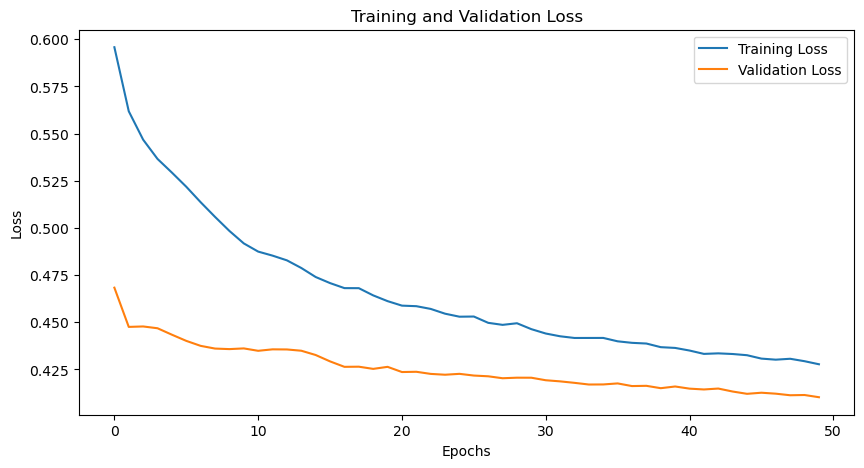

CPU times: user 13d 21h 44min 53s, sys: 1d 5h 46min 46s, total: 15d 3h 31min 39s
Wall time: 3h 47min 18s


In [114]:
%%time
# Initialize Model
# Update input_dim to include one-hot encoded permno_id length
# input_dim = 128*5+1
input_dim = stock_number+stock_number
model = TransformerModel(
    input_dim=input_dim,
    embed_dim=256,
    n_heads=16,
    ff_dim=1024,
    n_layers=1,
    output_dim=len(train_dataset.target_columns),
    # output_dim=1,
    dropout=0.25,
    attn_dropout=0.1,
    residual_dropout=0.1,
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training Loop
optimizer = torch.optim.RAdam(model.parameters(), lr=0.00005)
criterion = nn.L1Loss()
# criterion = nn.MSELoss()

train_losses = []
val_losses = []

num_epochs = 50
patience = 5
best_val_loss = float("inf")
patience_counter = 0

print("Starting Training...")
total_batches = num_epochs * len(train_dataloader)
total_start_time = time.time()

for epoch in range(num_epochs):
    start_time = time.time()  # Record the start time
    model.train()
    running_loss = 0.0
    batch_start_time = time.time()
    
    for i, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        output, _ = model(batch["features"].to(device))
        loss = criterion(output, batch["target"].to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 0:
            # print(f"Batch {i}, Loss: {loss}, train_loss: {running_loss}")
            elapsed_time = time.time() - batch_start_time
            remaining_batches = len(train_dataloader) - (i + 1)
            estimated_remaining_time_epoch = remaining_batches * (elapsed_time / (i + 1))
            
            total_elapsed_time = time.time() - total_start_time
            total_remaining_batches = total_batches - ((epoch * len(train_dataloader)) + (i + 1))
            estimated_remaining_time_total = total_remaining_batches * (total_elapsed_time / ((epoch * len(train_dataloader)) + (i + 1)))

            print(f"Batch {i}/{len(train_dataloader)}, Loss: {loss:.4f}, "
                  f"Estimated time left for epoch: {time.strftime('%H:%M:%S', time.gmtime(estimated_remaining_time_epoch))}, "
                  f"Estimated time left for training: {time.strftime('%H:%M:%S', time.gmtime(estimated_remaining_time_total))}")
            
    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            output, _ = model(batch["features"].to(device))
            loss = criterion(output, batch["target"].to(device))
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_dataloader))

    epoch_time = time.time() - start_time  # Calculate the elapsed time
    print(f"Epoch {epoch+1}/{num_epochs} took {epoch_time:.2f} seconds")
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}")

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

print("Training Complete")

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

#### Plot Prediction vs True Values (scaler.inverse_transform)

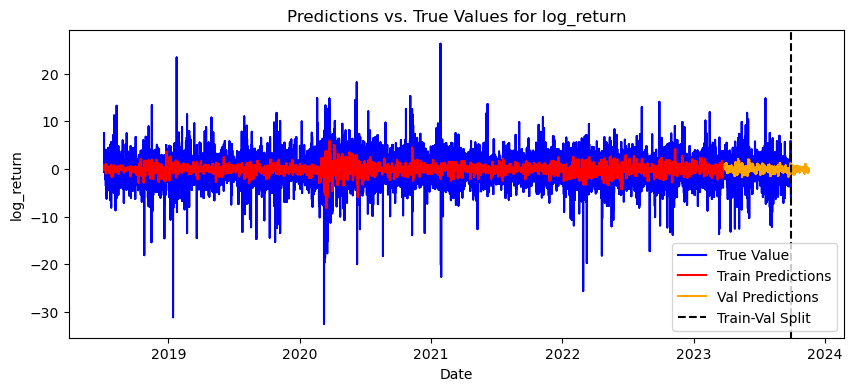

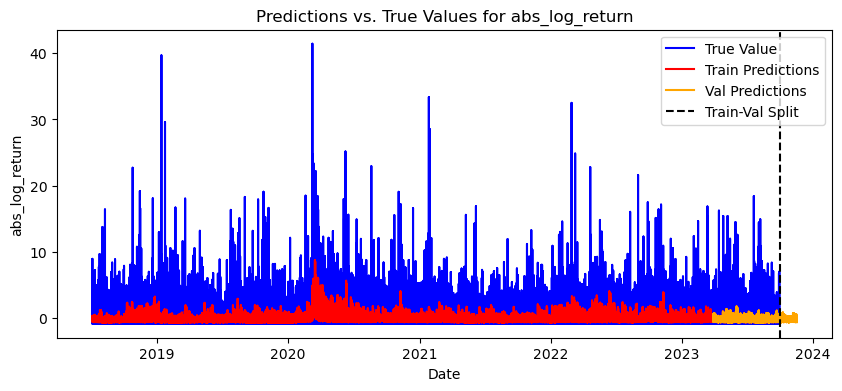

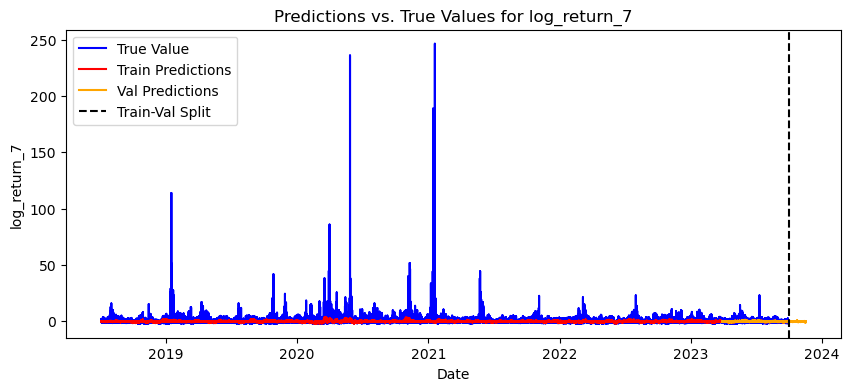

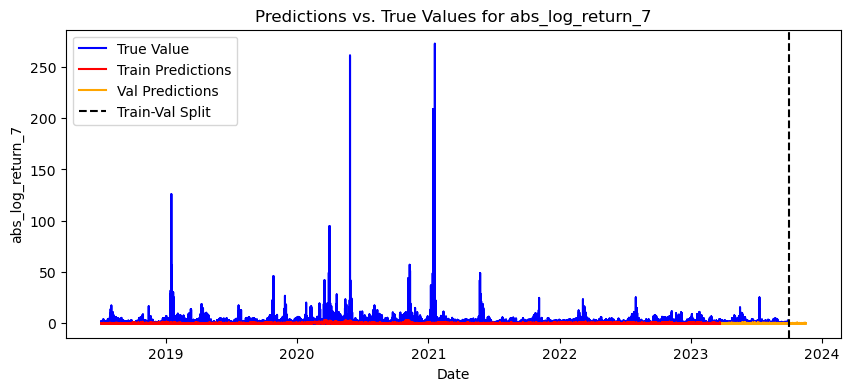

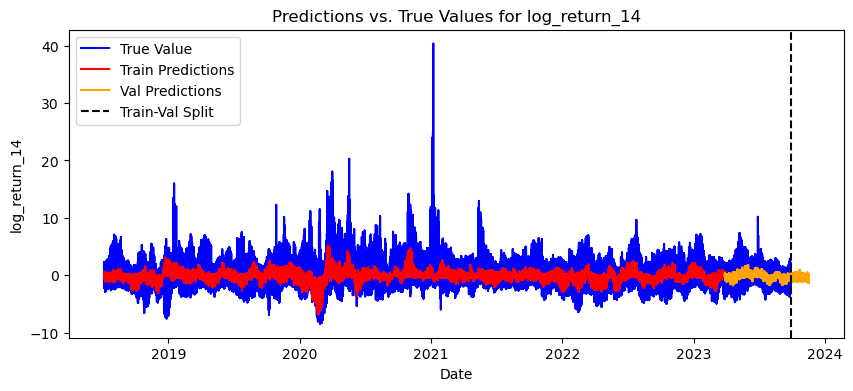

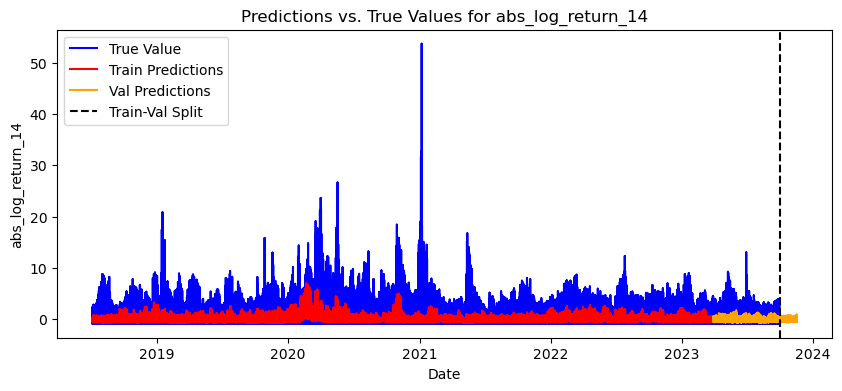

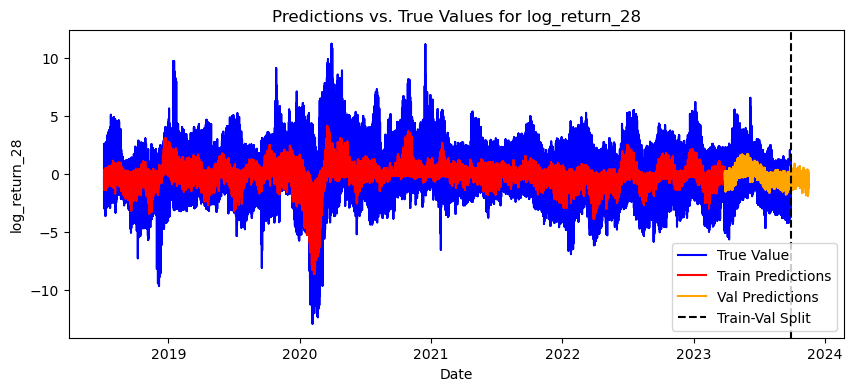

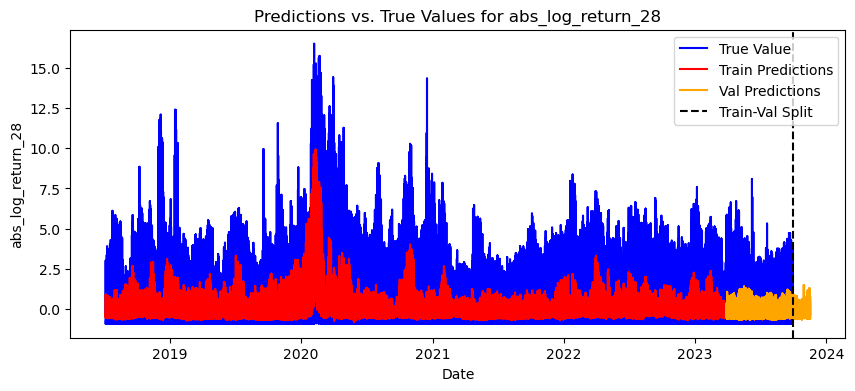

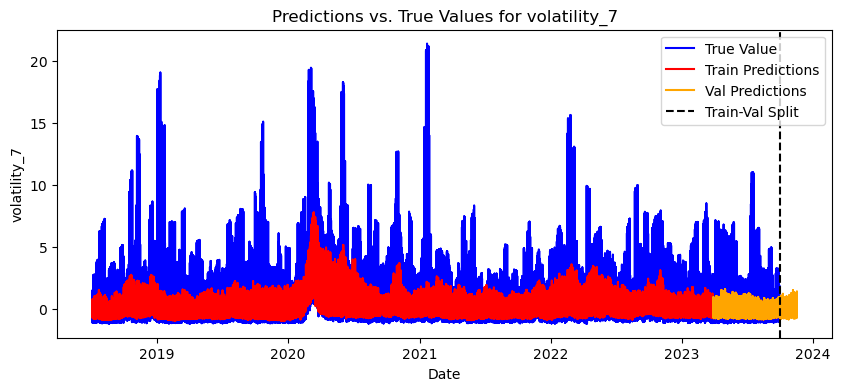

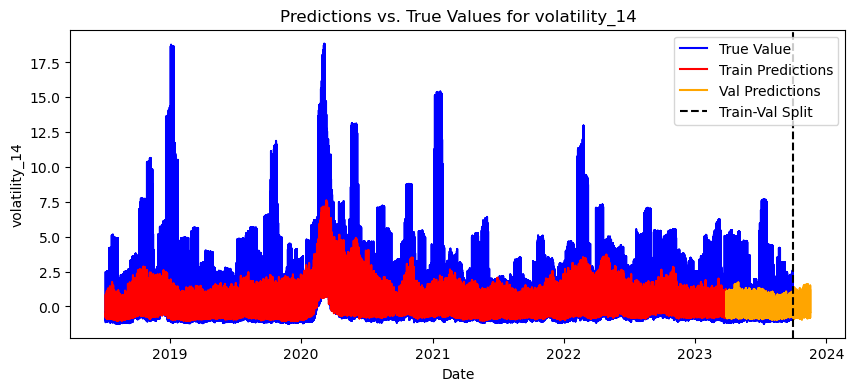

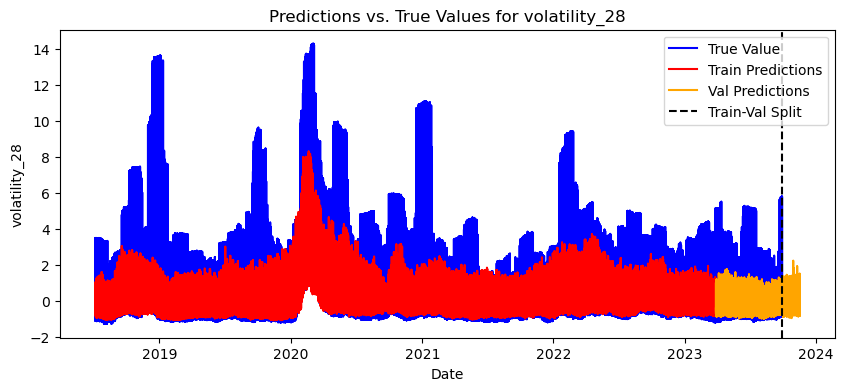

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

# Assuming the model and dataloaders are already defined and trained
# Also assuming the standardized_data is available

# Separate scaler for target columns
target_scaler = StandardScaler()
standardized_data[train_dataset.target_columns] = target_scaler.fit_transform(standardized_data[train_dataset.target_columns])

# Function to get predictions
def get_predictions(dataloader, model, device):
    model.eval()
    predictions = []
    true_values = []
    with torch.no_grad():
        for batch in dataloader:
            features = batch["features"].to(device)
            target = batch["target"].to(device)
            output, _ = model(features)
            # print(output.shape)
            predictions.append(output.cpu().numpy())
            true_values.append(target.cpu().numpy())
    return np.concatenate(predictions), np.concatenate(true_values)

# Get predictions for training and validation datasets
train_predictions, train_true_values = get_predictions(train_dataloader, model, device)
val_predictions, val_true_values = get_predictions(val_dataloader, model, device)

# Reshape predictions and true values to 2D arrays
train_predictions = train_predictions.reshape(-1, len(train_dataset.target_columns))
train_true_values = train_true_values.reshape(-1, len(train_dataset.target_columns))
val_predictions = val_predictions.reshape(-1, len(val_dataset.target_columns))
val_true_values = val_true_values.reshape(-1, len(val_dataset.target_columns))

# Inverse transform the predictions and true values using target_scaler
train_predictions = target_scaler.inverse_transform(train_predictions)
train_true_values = target_scaler.inverse_transform(train_true_values)
val_predictions = target_scaler.inverse_transform(val_predictions)
val_true_values = target_scaler.inverse_transform(val_true_values)

# Convert predictions and true values to DataFrame
train_predictions_df = pd.DataFrame(train_predictions, columns=train_dataset.target_columns)
train_true_values_df = pd.DataFrame(train_true_values, columns=train_dataset.target_columns)
val_predictions_df = pd.DataFrame(val_predictions, columns=val_dataset.target_columns)
val_true_values_df = pd.DataFrame(val_true_values, columns=val_dataset.target_columns)

# Ensure the date columns have matching lengths
train_dates = train_data.iloc[window_size:len(train_predictions) + window_size]['date'].values
if len(train_dates) < len(train_predictions_df):
    train_dates = np.append(train_dates, [train_dates[-1]] * (len(train_predictions_df) - len(train_dates)))
train_predictions_df['date'] = train_dates
train_true_values_df['date'] = train_dates

val_dates = validation_data.iloc[window_size:len(val_predictions) + window_size]['date'].values
if len(val_dates) < len(val_predictions_df):
    val_dates = np.append(val_dates, [val_dates[-1]] * (len(val_predictions_df) - len(val_dates)))
val_predictions_df['date'] = val_dates
val_true_values_df['date'] = val_dates

# Plotting function for each label
def plot_predictions_vs_true(label):
    plt.figure(figsize=(10, 4))

    # Plot the train data
    plt.plot(train_true_values_df['date'], train_true_values_df[label], label='True Value', color='blue')

    plt.plot(train_predictions_df['date'], train_predictions_df[label], label='Train Predictions', color='red')
    plt.plot(val_predictions_df['date'], val_predictions_df[label], label='Val Predictions', color='orange')

    plt.axvline(x=pd.to_datetime('2023-09-30'), color='black', linestyle='--', label='Train-Val Split')

    plt.xlabel('Date')
    plt.ylabel(label)
    plt.title(f'Predictions vs. True Values for {label}')
    plt.legend()
    plt.show()

# Plot for all labels
for label in train_dataset.target_columns:
    plot_predictions_vs_true(label)


#### Input Embedding Weights

In [128]:
input_embedding_weights = model.input_embedding.weight.detach().cpu().numpy().T
print(input_embedding_weights)

[[ 0.00333913 -0.03216721 -0.01361444 ...  0.00156244 -0.00633282
   0.02684934]
 [ 0.01868745 -0.02190028 -0.01800866 ... -0.01139815 -0.00769225
   0.01462484]
 [-0.01208954 -0.00996754 -0.01419065 ...  0.00829515 -0.00306563
   0.00653354]
 ...
 [ 0.03469574  0.04814986 -0.10843742 ...  0.06674406 -0.03693914
   0.07209086]
 [ 0.00725293 -0.00745765  0.16876718 ...  0.01542404  0.07349706
  -0.09504437]
 [-0.04726873  0.02546417 -0.06558011 ...  0.04953559 -0.07287131
   0.1574009 ]]


In [129]:
input_embedding_weights[stock_number:].shape

(472, 256)

In [130]:
cosine_sim_matrix_input_embedding_weights = cosine_similarity(input_embedding_weights[stock_number:])
cosine_sim_matrix_input_embedding_weights

array([[ 1.        ,  0.50049627,  0.17252009, ..., -0.264683  ,
         0.08233213, -0.3561233 ],
       [ 0.50049627,  1.0000002 ,  0.49539608, ...,  0.16354732,
        -0.16642605,  0.03577248],
       [ 0.17252009,  0.49539608,  1.0000001 , ...,  0.4126427 ,
        -0.27640226,  0.23460591],
       ...,
       [-0.264683  ,  0.16354732,  0.4126427 , ...,  0.99999994,
        -0.47735593,  0.5921746 ],
       [ 0.08233213, -0.16642605, -0.27640226, ..., -0.47735593,
         1.        , -0.47508258],
       [-0.3561233 ,  0.03577248,  0.23460591, ...,  0.5921746 ,
        -0.47508258,  1.0000004 ]], dtype=float32)

In [131]:
permno_ids = list(train_data['permno_id'].unique())
# Ensure the number of permno_ids matches the dimension of the cosine similarity matrix
if len(permno_ids) != cosine_sim_matrix_input_embedding_weights.shape[0]:
    raise ValueError("The number of permno_ids does not match the dimension of the cosine similarity matrix")

In [132]:
# Create a DataFrame with permno_id as labels
cosine_sim_df_input_embedding_weights = pd.DataFrame(cosine_sim_matrix_input_embedding_weights, index=permno_ids, columns=permno_ids)

# Save the DataFrame to a CSV file
cosine_sim_df_input_embedding_weights.to_csv("cosine_sim_matrix_input_embedding_weights_472stocks_1.csv")


In [133]:
# pd.DataFrame(cosine_sim_matrix_input_embedding_weights).to_csv("cosine_sim_matrix_input_embedding_weights_472stocks_1.csv")

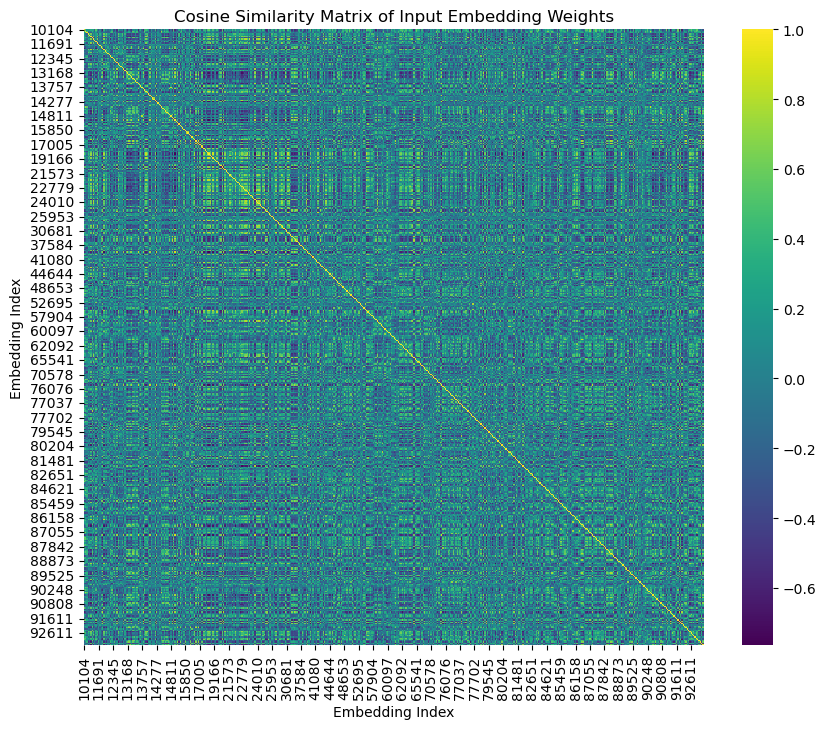

In [134]:
# Plot the cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df_input_embedding_weights, annot=False, cmap='viridis')
plt.title('Cosine Similarity Matrix of Input Embedding Weights')
plt.xlabel('Embedding Index')
plt.ylabel('Embedding Index')
plt.show()

In [ ]:
# # Plot the cosine similarity matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_sim_matrix_input_embedding_weights, annot=False, cmap='viridis')
# plt.title('Cosine Similarity Matrix of Input Embedding Weights')
# plt.xlabel('Embedding Index')
# plt.ylabel('Embedding Index')
# plt.show()

In [ ]:
# fc_weights = model.fc.weight.detach().cpu().numpy()
# print(fc_weights)

In [ ]:
# fc_weights.shape

In [ ]:
# cosine_sim_matrix_fc_weights = cosine_similarity(fc_weights)
# cosine_sim_matrix_fc_weights

In [ ]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_sim_matrix_fc_weights, annot=False, cmap='viridis')
# plt.title('Cosine Similarity Matrix of Input Embedding Weights')
# plt.xlabel('Embedding Index')
# plt.ylabel('Embedding Index')
# plt.show()

#### Feed_Forward Weights

In [ ]:
# # To get the weights of the first encoder layer
# encoder_layer_weights = model.transformer.layers[0].state_dict()
# encoder_layer_weights

In [ ]:
# # If you want to get the weights of all encoder layers
# all_encoder_layers_weights = [layer.state_dict() for layer in model.transformer.layers]
# all_encoder_layers_weights

In [ ]:
# # Attention weights
# attention_weights = encoder_layer_weights['self_attn.in_proj_weight']

# # Feedforward weights
# feedforward_weights = encoder_layer_weights['linear1.weight']

# print("Attention Weights:", attention_weights.shape)
# print("Feedforward Weights:", feedforward_weights.shape)


In [ ]:
# feedforward_weights_matrix = feedforward_weights.cpu().numpy()
# feedforward_weights_matrix

In [ ]:
# cosine_sim_matrix_feedforward_weights = cosine_similarity(feedforward_weights_matrix)
# cosine_sim_matrix_feedforward_weights

In [ ]:
# # Plot the cosine similarity matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_sim_matrix_feedforward_weights, annot=False, cmap='viridis')
# plt.title('Cosine Similarity Matrix of Input Embedding Weights')
# plt.xlabel('Embedding Index')
# plt.ylabel('Embedding Index')
# plt.show()

#### Extract Last Output Embedding

In [135]:
# Extract embeddings for each stock
stock_embeddings = {}
model.eval()
with torch.no_grad():
    for batch in train_dataloader:
        _, embeddings = model(batch["features"].to(device))
        for i, permno_id in enumerate(batch["permno_id"]):
            stock_embeddings[permno_id] = embeddings[i].cpu().numpy()  # Keep only the last embedding

In [136]:
# Convert the dictionary to lists
permno_ids = list(stock_embeddings.keys())
embeddings_list = list(stock_embeddings.values())

# Convert the list of embeddings to a numpy array
embeddings_array = np.array(embeddings_list)

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(embeddings_array)
cosine_sim_matrix

array([[1.0000001 , 0.9348181 , 0.89197075, ..., 0.5324462 , 0.8508611 ,
        0.46533448],
       [0.9348181 , 1.0000004 , 0.93553585, ..., 0.7102579 , 0.7509102 ,
        0.605831  ],
       [0.89197075, 0.93553585, 1.0000004 , ..., 0.80144125, 0.7175942 ,
        0.7533648 ],
       ...,
       [0.5324462 , 0.7102579 , 0.80144125, ..., 1.0000002 , 0.37850478,
        0.8852599 ],
       [0.8508611 , 0.7509102 , 0.7175942 , ..., 0.37850478, 1.        ,
        0.31532967],
       [0.46533448, 0.605831  , 0.7533648 , ..., 0.8852599 , 0.31532967,
        1.0000002 ]], dtype=float32)

In [137]:
# Create a DataFrame with permno_id as labels
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=permno_ids, columns=permno_ids)

# Save the DataFrame to a CSV file
cosine_sim_df.to_csv("cosine_sim_matrix_last_output_embedding_472stocks_1.csv")

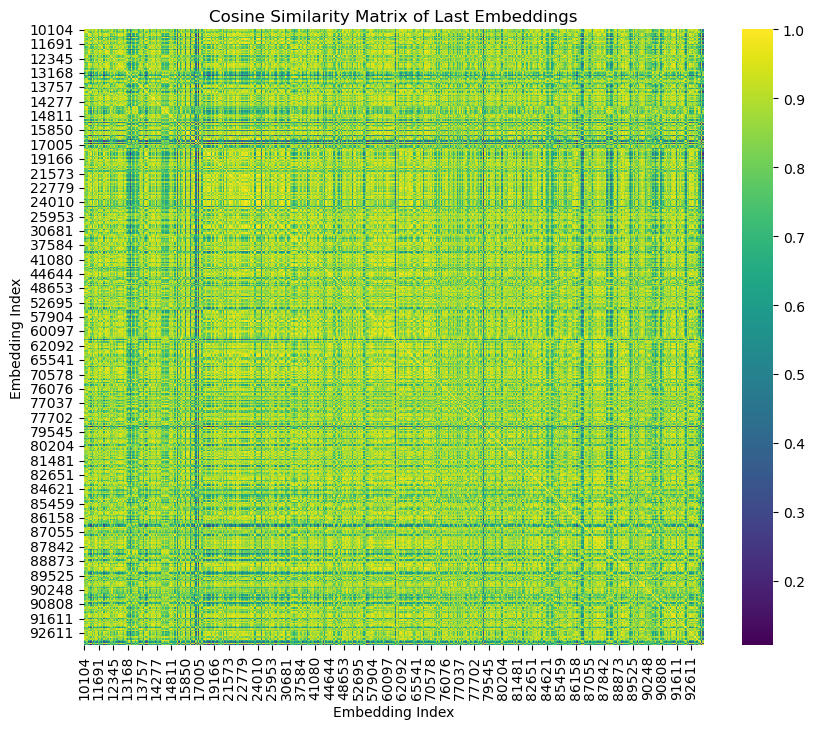

In [138]:
# Plot the cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=False, cmap='viridis')
plt.title('Cosine Similarity Matrix of Last Embeddings')
plt.xlabel('Embedding Index')
plt.ylabel('Embedding Index')
plt.show()

In [ ]:
# %%time
# # Assuming stock_embeddings is a dictionary with permno_id as keys and embeddings as values
# embeddings_list = []
# permno_ids = []

# for permno_id, embedding in stock_embeddings.items():
#     permno_ids.append(permno_id)
#     embeddings_list.append(embedding)

# # Convert the list of embeddings to a numpy array
# embeddings_array = np.array(embeddings_list)

# # Transform embeddings using cosine similarity
# cosine_sim_matrix = cosine_similarity(embeddings_array)
# cosine_sim_matrix

In [ ]:
# # Plot the cosine similarity matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_sim_matrix, annot=False, cmap='viridis')
# plt.title('Cosine Similarity Matrix')
# plt.xlabel('Embedding Index')
# plt.ylabel('Embedding Index')
# plt.show()

In [ ]:
# pd.DataFrame(cosine_sim_matrix).to_csv("cosine_sim_matrix_last_output_embedding_472stocks_1.csv")

In [ ]:

# with torch.no_grad():
#     for batch in train_dataloader:
#         _, embeddings = model(batch["features"].to(device))

In [ ]:
# # output_embedding_matrix = embeddings[:,-1,:].cpu().numpy()
# output_embedding_matrix = embeddings.cpu().numpy()
# output_embedding_matrix

In [ ]:
# output_embedding_matrix.shape

In [ ]:
# cosine_sim_matrix_out_embedding = cosine_similarity(output_embedding_matrix)
# cosine_sim_matrix_out_embedding

In [ ]:
# # Plot the cosine similarity matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_sim_matrix_out_embedding, annot=False, cmap='viridis')
# plt.title('Cosine Similarity Matrix of Output Embedding Weights')
# plt.xlabel('Embedding Index')
# plt.ylabel('Embedding Index')
# plt.show()

#### Average Output Embedding

In [139]:
%%time
# Extract embeddings for each stock
stock_embeddings = {}
model.eval()
with torch.no_grad():
    for batch in train_dataloader:
        _, embeddings = model(batch["features"].to(device))
        for i, permno_id in enumerate(batch["permno_id"]):
            if permno_id not in stock_embeddings:
                stock_embeddings[permno_id] = []
            stock_embeddings[permno_id].append(embeddings[i].cpu().numpy())

CPU times: user 4h 29min 25s, sys: 23min 58s, total: 4h 53min 24s
Wall time: 3min 4s


In [140]:
%%time
# Average the embeddings for each stock
for permno_id in stock_embeddings:
    stock_embeddings[permno_id] = np.mean(stock_embeddings[permno_id], axis=0)

CPU times: user 11.9 s, sys: 1.02 s, total: 12.9 s
Wall time: 1.47 s


In [141]:
%%time
# Assuming stock_embeddings is a dictionary with permno_id as keys and embeddings as values
embeddings_list = []
permno_ids = []

for permno_id, embedding in stock_embeddings.items():
    permno_ids.append(permno_id)
    embeddings_list.append(embedding)

# Convert the list of embeddings to a numpy array
embeddings_array = np.array(embeddings_list)

# Transform embeddings using cosine similarity
cosine_sim_matrix = cosine_similarity(embeddings_array)
cosine_sim_matrix

CPU times: user 3.87 ms, sys: 0 ns, total: 3.87 ms
Wall time: 3.13 ms


array([[ 0.9999998 ,  0.89293176,  0.81894624, ...,  0.2413934 ,
         0.7958623 ,  0.06181906],
       [ 0.89293176,  0.9999999 ,  0.9258228 , ...,  0.57116246,
         0.6041135 ,  0.35923243],
       [ 0.81894624,  0.9258228 ,  1.0000001 , ...,  0.65562356,
         0.58986855,  0.49914357],
       ...,
       [ 0.2413934 ,  0.57116246,  0.65562356, ...,  1.0000001 ,
         0.05875598,  0.81221133],
       [ 0.7958623 ,  0.6041135 ,  0.58986855, ...,  0.05875598,
         1.0000001 , -0.08409263],
       [ 0.06181906,  0.35923243,  0.49914357, ...,  0.81221133,
        -0.08409263,  1.        ]], dtype=float32)

In [142]:
# Create a DataFrame with permno_id as labels
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=permno_ids, columns=permno_ids)

# Save the DataFrame to a CSV file
cosine_sim_df.to_csv("cosine_sim_matrix_ave_output_embedding_472stocks_1.csv")

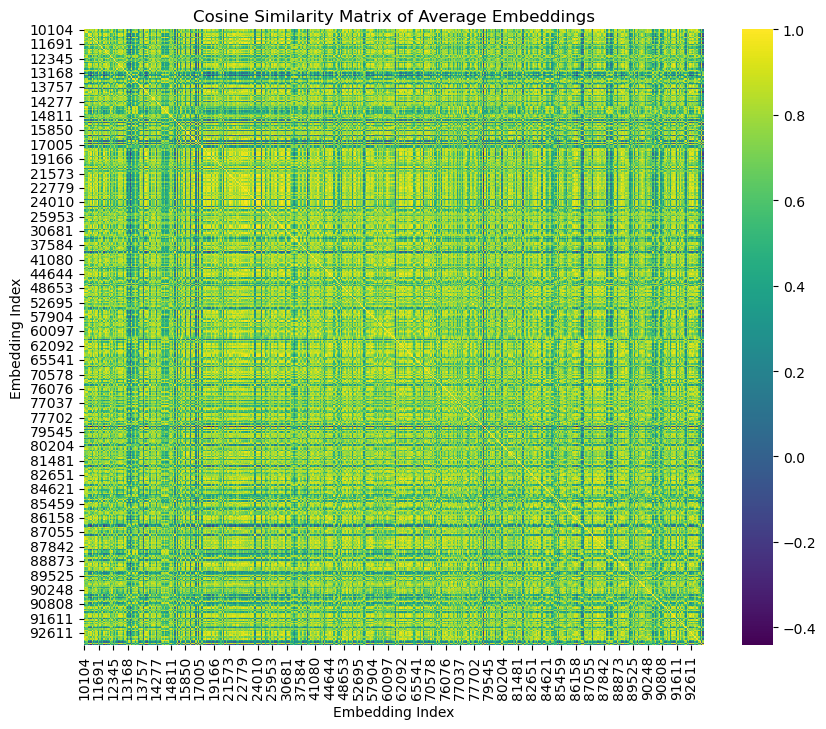

In [143]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=False, cmap='viridis')
plt.title('Cosine Similarity Matrix of Average Embeddings')
plt.xlabel('Embedding Index')
plt.ylabel('Embedding Index')
plt.show()

In [ ]:
# # Plot the cosine similarity matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_sim_matrix, annot=False, cmap='viridis')
# plt.title('Cosine Similarity Matrix')
# plt.xlabel('Embedding Index')
# plt.ylabel('Embedding Index')
# plt.show()

In [ ]:
# pd.DataFrame(cosine_sim_matrix).to_csv("cosine_sim_matrix_ave_output_embedding_472stocks_1.csv")

In [ ]:
# # Initialize an empty tensor to accumulate the embeddings
# accumulated_embeddings = torch.zeros(128, 256).to(device)
# total_batches = 0

# with torch.no_grad():
#     for batch in train_dataloader:
#         _, embeddings = model(batch["features"].to(device))
#         #print(embeddings)
#         accumulated_embeddings += embeddings.sum(dim=1)
#         # total_batches += batch["features"].size(0)
#         total_batches += embeddings.size(1)

# # Divide the accumulated embeddings by the total number of batches to get the average
# average_embeddings = accumulated_embeddings / total_batches
# print(total_batches)
# average_embeddings

In [ ]:
# average_embeddings.shape

In [ ]:
# batch["features"].shape

In [ ]:
# batch["features"].size(0)

In [ ]:
# # Plot the cosine similarity matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_similarity(average_embeddings.cpu().numpy()), annot=False, cmap='viridis')
# plt.title('Cosine Similarity Matrix of Input Embedding Weights')
# plt.xlabel('Embedding Index')
# plt.ylabel('Embedding Index')
# plt.show()